In [4]:
# llamada a las librerias
import numpy as np # librería para cálculos matematicos

# llamada a librerias definidas
import funcionesCalculo as ft # libreria de funciones auxiliares y de cálculo


# importacion de datos del terreno del archivo datos_terreno.xlsx
espesor,cotas,az,nivel_freatico,pe_seco,pe_saturado,cu,cohesion,fi,tipo_datos=ft.datos_terreno()

In [2]:
espesor,cotas,az,nivel_freatico,pe_seco,pe_saturado,cu,cohesion,fi,tipo_datos=ft.datos_terreno()


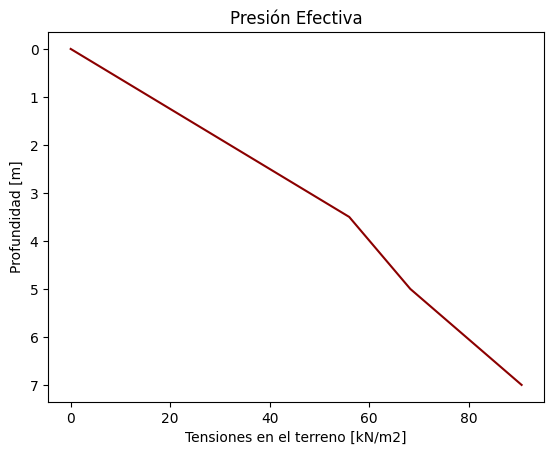

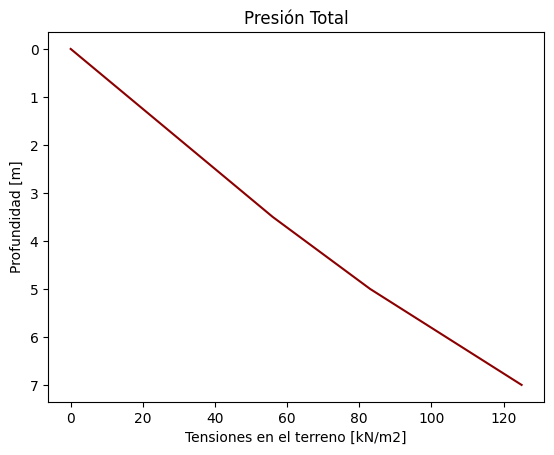

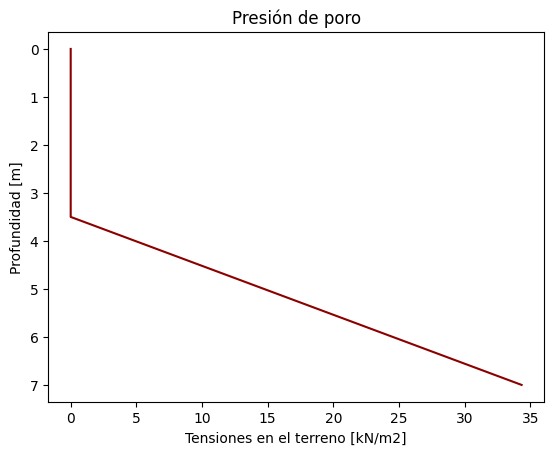

In [5]:
valor_z=np.arange(0,7+0.10,0.10)
presionEfectiva=[]
presionTotal=[]
presionPoro=[]

for z in valor_z:
    pe_sat=pe_saturado[ft.parametro_terreno(cotas,z)]
    pe_ap=pe_seco[ft.parametro_terreno(cotas,z)]
    presion=ft.presion_total(cotas,nivel_freatico,pe_saturado,pe_seco,z)
    u_z=ft.n_freatico(nivel_freatico,z)*9.81
    presion_efectiva=presion-u_z
   
    presionEfectiva.append(presion_efectiva)
    presionTotal.append(presion)
    presionPoro.append(u_z)
    #print(z,presion,presion_efectiva)

# ploreado de las graficas de tensiones
ft.grafico_presiones(presionEfectiva,valor_z,'Presión Efectiva')
ft.grafico_presiones(presionTotal,valor_z,'Presión Total')
ft.grafico_presiones(presionPoro,valor_z,'Presión de poro')


In [70]:
ft.n_freatico(nivel_freatico,4)*9.81

4.905